##### Заполните код в клетках (где написано "Ваш код здесь")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Считываем файл titanic_train.csv

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### 1. Сколько мужчин / женщин находилось на борту? 

Напишите код и правильный вариант ответа

1) 412 мужчин и 479 женщин

2) 314 мужчин и 577 женщин

3) 479 мужчин и 412 женщин

4) 577 мужчин и 314 женщин

In [3]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Правильный ответ: (4) 577 мужчин и 314 женщин

#####  2. Выведите распределение переменной Pclass (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?

Напишите код и правильный вариант ответа

1) 104

2) 108

3) 112

4) 125

In [4]:
print("Распределение Pclass:")
print(df["Pclass"].value_counts())
print()
print("Распределение Pclass по полам:")
print(df.groupby(["Sex"])["Pclass"].value_counts())
print()
print("Мужчин 2-го класса:")
print(df[ df["Sex"] == "male"][df["Pclass"] == 2].count()["Pclass"])

Распределение Pclass:
3    491
1    216
2    184
Name: Pclass, dtype: int64

Распределение Pclass по полам:
Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

Мужчин 2-го класса:
108


C:\Users\dimya\AppData\Local\Temp\ipykernel_13848\2145572738.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[ df["Sex"] == "male"][df["Pclass"] == 2].count()["Pclass"])


Правильный ответ: (2) 108

#####  3. Каковы медиана и стандартное отклонение платежей (Fare)? 

Напишите код и правильный вариант ответа

1) Медиана – 14.45, стандартное отклонение – 49.69

2) Медиана – 15.1, стандартное отклонение – 12.15

3) Медиана – 13.15, стандартное отклонение – 35.3

4) Медиана – 17.43, стандартное отклонение – 39.1

In [5]:
df.describe().loc[["50%", "std"],["Fare"]]

,Fare
50%,14.454200
std,49.693429


Правильный ответ: (1)


##### 4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 22.7% среди молодых и 40.6% среди старых

2) 40.6% среди молодых и 22.7% среди старых

3) 35.3% среди молодых и 27.4% среди старых

4) 27.4% среди молодых и 35.3% среди старых

In [6]:
under30 = df[df["Age"] < 30]["Survived"].value_counts(normalize = True)[1] * 100
over60 = df[df["Age"] > 60]["Survived"].value_counts(normalize = True)[1] * 100
print(f"Выжило младше 30: {under30:.1f} %")
print(f"Выжило старше 60: {over60:.1f} %")

Выжило младше 30: 40.6 %
Выжило старше 60: 22.7 %


##### 5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?

Напишите код и правильный вариант ответа

1) 30.2% среди мужчин и 46.2% среди женщин

2) 35.7% среди мужчин и 74.2% среди женщин

3) 21.1% среди мужчин и 46.2% среди женщин

4) 18.9% среди мужчин и 74.2% среди женщин


In [7]:
man = df[df["Sex"] == "male"]["Survived"].value_counts(normalize = True)[1] * 100
woman = df[df["Sex"] == "female"]["Survived"].value_counts(normalize = True)[1] * 100
print(f"Выжило мужчин: {man:.1f} %")
print(f"Выжило женщин: {woman:.1f} %")

Выжило мужчин: 18.9 %
Выжило женщин: 74.2 %


##### 6. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?

Напишите код и правильный вариант ответа

1) Да

2) Нет


               Fare        Age
Survived                      
0         22.117887  30.626179
1         48.395408  28.343690


<AxesSubplot:xlabel='Survived'>

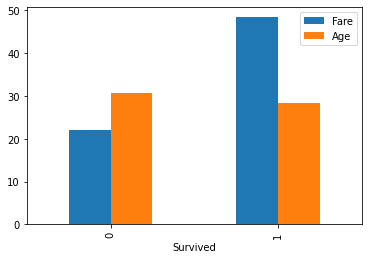

In [8]:
data = df.loc[:, ["Survived", "Fare", "Age"]].groupby("Survived").mean()
print(data)
data.plot(kind = "bar")


Правильный ответ: (1)


##### 7. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:

Напишите код и правильный вариант ответа

1) В среднем мужчины 1-го класса старше 40 лет

2) В среднем женщины 1-го класса старше 40 лет

3) Мужчины всех классов в среднем старше женщин того же класса

4) В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [9]:
print(df.loc[:, ["Age", "Sex", "Pclass"]].groupby(["Pclass", "Sex"]).mean())
print(df.loc[:, ["Age", "Pclass"]].groupby(["Pclass"]).mean())

                     Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589
              Age
Pclass           
1       38.233441
2       29.877630
3       25.140620


Верные утверждения: [1, 3, 4]

##### 8. Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived. (метод scatter_matrix Pandas или pairplot Seaborn).

Напишите код и визуализируйте

      Age     Fare  Pclass     Sex  SibSp  Parch Embarked  Survived
0    22.0   7.2500       3    male      1      0        S         0
1    38.0  71.2833       1  female      1      0        C         1
2    26.0   7.9250       3  female      0      0        S         1
3    35.0  53.1000       1  female      1      0        S         1
4    35.0   8.0500       3    male      0      0        S         0
..    ...      ...     ...     ...    ...    ...      ...       ...
886  27.0  13.0000       2    male      0      0        S         0
887  19.0  30.0000       1  female      0      0        S         1
888   NaN  23.4500       3  female      1      2        S         0
889  26.0  30.0000       1    male      0      0        C         1
890  32.0   7.7500       3    male      0      0        Q         0

[891 rows x 8 columns]
[[<AxesSubplot:xlabel='Age', ylabel='Age'>
  <AxesSubplot:xlabel='Fare', ylabel='Age'>
  <AxesSubplot:xlabel='Pclass', ylabel='Age'>
  <AxesSubplot:xlabel='SibS

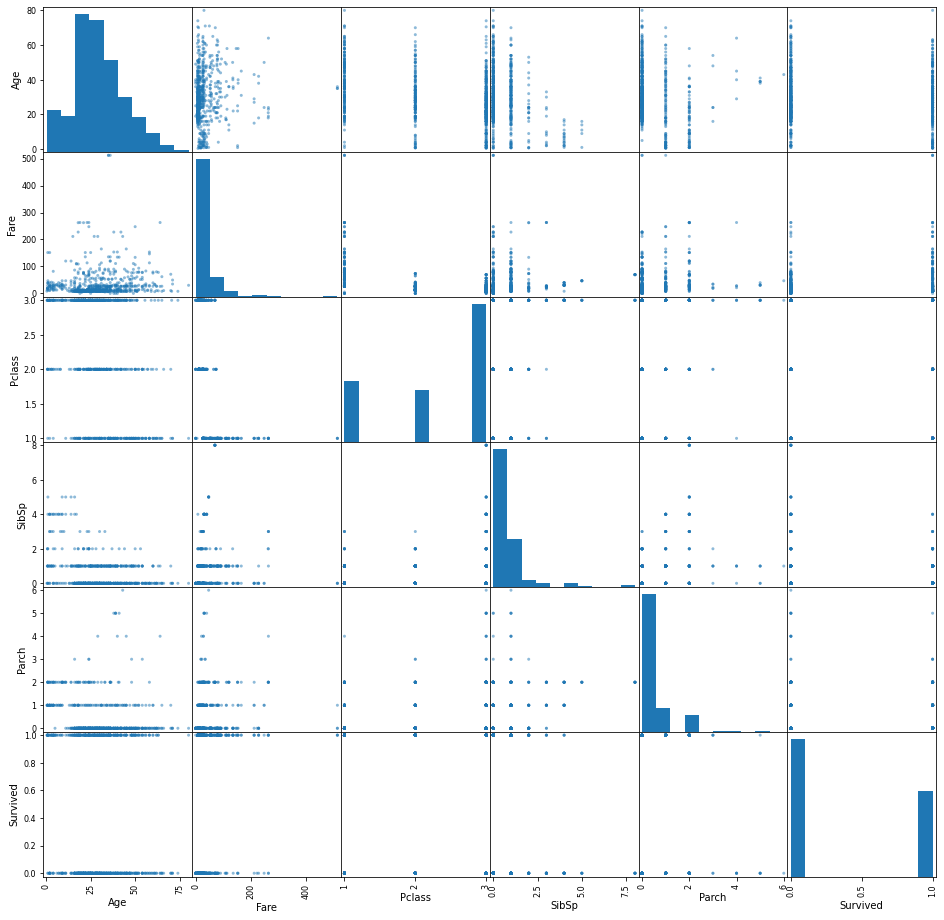

In [10]:
data = df.loc[:, ["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]]
print(data)
print(pd.plotting.scatter_matrix(data, figsize = (16, 16)))

##### 9. Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot.

Напишите код и визуализируйте

         Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500


<AxesSubplot:title={'center':'Fare'}, xlabel='[Pclass]'>

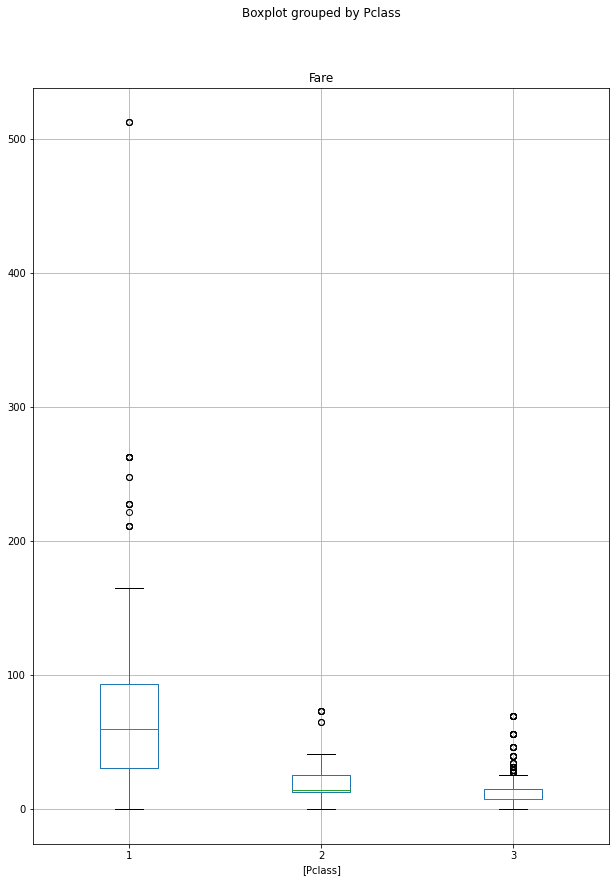

In [11]:
data = df.loc[:, ["Fare", "Pclass"]]
print(data.groupby("Pclass").describe())
data.boxplot(by = "Pclass", figsize = (10, 14))

##### 10. Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

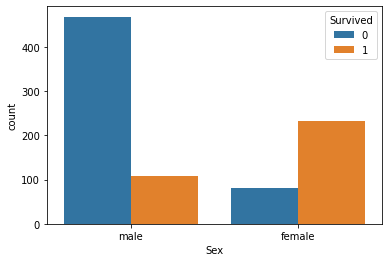

In [12]:
data = df.groupby(["Sex", "Survived"])["PassengerId"].count()
print(data)
#sb.countplot(x = "Survived", hue = "Sex", data = df)
sb.countplot(x = "Sex", hue = "Survived", data = df)

##### 11. Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.

Напишите код и визуализируйте

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

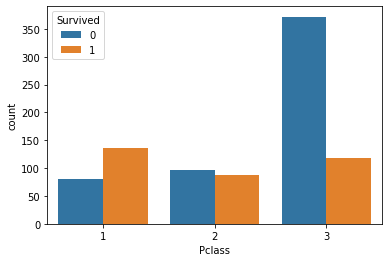

In [13]:
data = df.groupby(["Pclass", "Survived"])["PassengerId"].count()
print(data)
#sb.countplot(x = "Survived", hue = "Pclass", data = df)
sb.countplot(x = "Pclass", hue = "Survived", data = df)

##### 12. Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.

Напишите код и визуализируйте

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked AgeGroup  
0      0         A/5 21171   7.2500   NaN        S    young  
1      0          PC 17599  71.2833   C85        C  average  
2      0  STON/O2. 3101282   7.9250   NaN        S    young  
3      0            113803  53.1000  C123        S  average  
4      0  

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

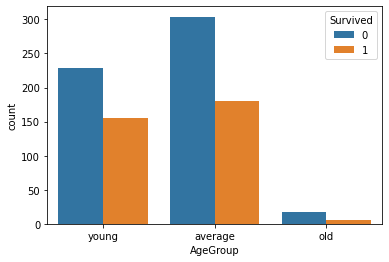

In [15]:
def get_age_type(age):
    if age == None:
         return "average"
    if age < 30:
        return "young"
    elif age > 60:
        return "old"
    else:
        return "average"

df["AgeGroup"] = df["Age"].apply(get_age_type)
print(df.groupby(["AgeGroup", "Survived"])["PassengerId"].count())
sb.countplot(data = df, x = "AgeGroup", hue = "Survived")